# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET

In [ ]:
df = pd.read_csv("Boston_housing.csv")

In [ ]:
print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

Shape: (506, 14) (Rows: 506, Columns: 14)


# STEP 3: BASIC EDA - WHAT INTERVIEWERS EXPECT

In [ ]:
# 3.1 First Look at Data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# 3.2 Data Info - Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# 3.3 Statistical Summary - Key metrics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# 3.4 Check Missing Values - CRITICAL FOR INTERVIEWS

missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Percentage": missing_percent
})

print(missing_df[missing_df["Missing_Count"] > 0])

       Missing_Count  Percentage
CRIM              20    3.952569
ZN                20    3.952569
INDUS             20    3.952569
CHAS              20    3.952569
AGE               20    3.952569
LSTAT             20    3.952569


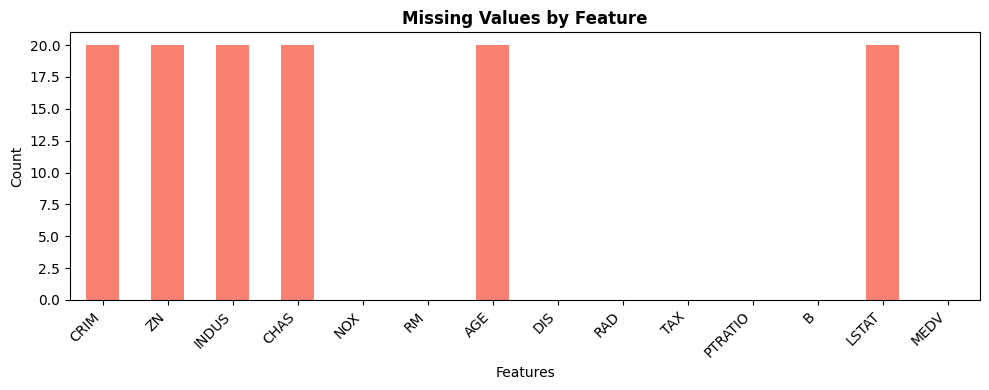

In [ ]:
# 3.5 Visualize Missing Values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 4))
    df.isnull().sum().plot(kind='bar', color='salmon')
    plt.title('Missing Values by Feature', fontweight='bold')
    plt.ylabel('Count')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# 3.6 Target Variable Distribution - IMPORTANT FOR INTERVIEWS
print("\n--- Target Variable (MEDV) Analysis ---")
print(f"Mean a: ${df['MEDV'].mean():.2f}k")
print(f"Median Price: ${df['MEDV'].median():.2f}k")
print(f"Min Price: ${df['MEDV'].min():.2f}k")
print(f"Max Price: ${df['MEDV'].max():.2f}k")
print(f"Std Dev: ${df['MEDV'].std():.2f}k")


--- Target Variable (MEDV) Analysis ---
Mean Price: $22.53k
Median Price: $21.20k
Min Price: $5.00k
Max Price: $50.00k
Std Dev: $9.20k


In [ ]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

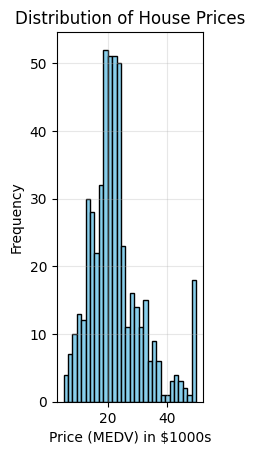

In [ ]:
# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['MEDV'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price (MEDV) in $1000s')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True, alpha=0.3)


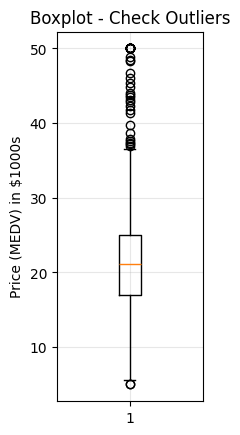

In [ ]:
# Boxplot - Shows outliers
plt.subplot(1, 3, 2)
plt.boxplot(df['MEDV'], vert=True)
plt.ylabel('Price (MEDV) in $1000s')
plt.title('Boxplot - Check Outliers')
plt.grid(True, alpha=0.3)

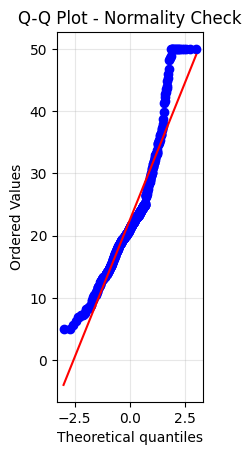

In [ ]:
# Q-Q Plot - Check normality
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Normality Check')
plt.grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3.7 Correlation Analysis - MUST SHOW IN INTERVIEWS

correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation.head(10))

MEDV    1.000000
RM      0.695360
ZN      0.362292
B       0.333461
DIS     0.249929
CHAS    0.183844
AGE    -0.377572
RAD    -0.381626
CRIM   -0.383895
NOX    -0.427321
Name: MEDV, dtype: float64


In [ ]:
print(correlation.tail())

NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


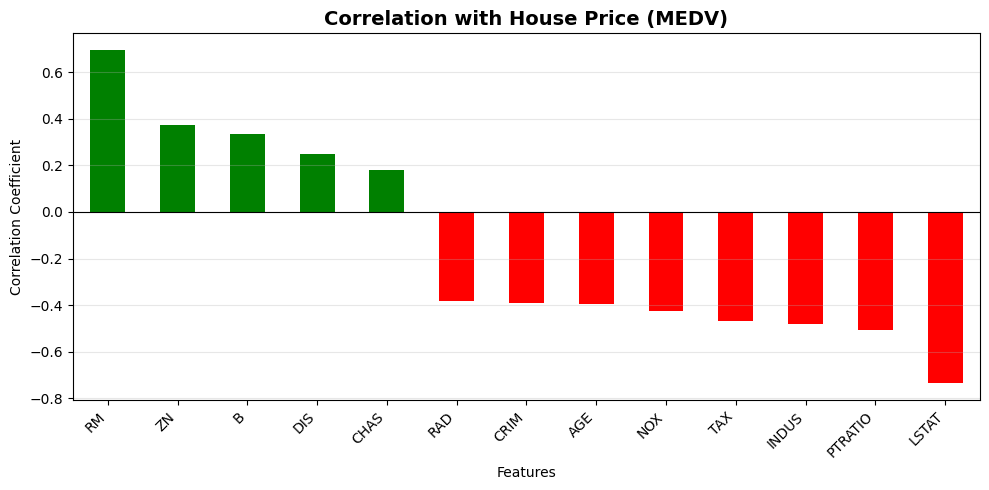

In [ ]:
# Visualize Correlation with Target
plt.figure(figsize=(10, 5))
correlation.drop('MEDV').plot(kind='bar',
                               color=['green' if x > 0 else 'red' for x in correlation.drop('MEDV')])
plt.title('Correlation with House Price (MEDV)', fontweight='bold', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

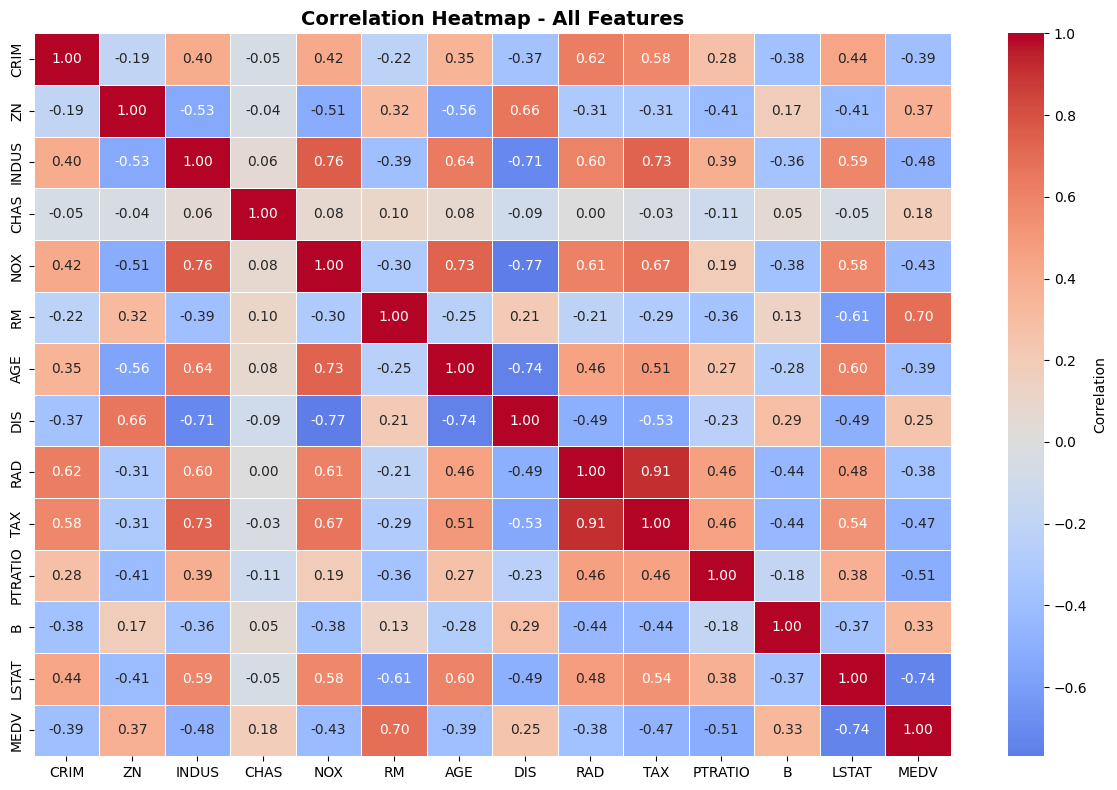

In [ ]:
# 3.8 Correlation Heatmap - INTERVIEWERS LOVE THIS
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap - All Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# STEP 4: DATA PREPROCESSING

In [ ]:
# 4.1 Handle Missing Values

print(f"Missing value Before: {df.isnull().sum().sum()}")

Missing value Before: 120


In [ ]:
# Fill The Missing Values

df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
print(f"Missing Value After: {df.isnull().sum().sum()}")

Missing Value After: 0


In [ ]:
# 4.2 Separate Features and Target

X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
# print(f"Features of X: {X.head()}")
# print(f"Features of y: {y.head()}")

In [ ]:
print(f"Feature (X): {X.shape}")
print(f"Feature (y): {y.shape}")

Feature (X): (506, 13)
Feature (y): (506,)


# STEP 5: TRAIN-TEST SPLIT


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

Training set: 404 samples (79.8%)
Testing set: 102 samples (20.2%)


# STEP 6: FEATURE SCALING - EXPLAIN WHY IN INTERVIEWS

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Applied StandardScaler (Z-score normalization)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: LINEAR REGRESSION - BASE MODEL



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
model.score(X_test_scaled, y_test)

0.659101389390351

# STEP 8: Evaluate the Model

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Linear Regression")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Linear Regression
Mean Absolute Error: 3.3980304390827945
Mean Squared Error: 28.32322356220053
R2 Score: 0.6137765932478889


# Feature Importance

In [ ]:
# Feature Importance Analysis
print("\n--- Feature Importance ---")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)
print("\nTop 3 Most Important Features:")
print(feature_importance.head(3).to_string(index=False))



--- Feature Importance ---
    Feature  Coefficient
5        RM     3.342439
7       DIS    -3.206119
12    LSTAT    -3.090931
10  PTRATIO    -1.981109
4       NOX    -1.878393
8       RAD     1.872101
9       TAX    -1.502738
11        B     1.100450
0      CRIM    -0.993472
3      CHAS     0.832908
1        ZN     0.648245
6       AGE    -0.496382
2     INDUS    -0.171919

Top 3 Most Important Features:
Feature  Coefficient
     RM     3.342439
    DIS    -3.206119
  LSTAT    -3.090931


# Add Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\nCross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Cross-Validation R² Scores: [0.77351282 0.61389846 0.74899139 0.75635427 0.67522526]
Mean CV R²: 0.7136 (+/- 0.0601)


# STEP 8: RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
# Prediction
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
print("Ridge Regression")
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"r2 Score: {r2}")

Ridge Regression
Mean Absolute Error: 3.145695676588297
Mean Square Error: 25.002717405894444
r2 Score: 0.6590559449083203


# STEP 9: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
lasso.score(X_test_scaled, y_test)

0.621016433933143

In [ ]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
print(f"Lasso Regression")
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("MAE: ", mean_absolute_error(y_test, y_pred_lasso))
print("MSE: ", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score: ", r2_score(y_test, y_pred_lasso))

Lasso Regression
MAE:  3.4499834012081827
MSE:  27.792298655272816
R2 Score:  0.621016433933143


# STEP 10: ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet = ElasticNet()

In [ ]:
elasticnet.fit(X_train_scaled, y_train)

ElasticNet()

In [ ]:
y_pred_elastic = elasticnet.predict(X_test_scaled)

In [ ]:
print("ElasticNet Regression")
mae = mean_absolute_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
r2 = r2_score(y_test, y_pred_elastic)

print("MAE: ", mean_absolute_error(y_test, y_pred_elastic))
print("MSE: ", mean_squared_error(y_test, y_pred_elastic))
print("R2 Score: ", r2_score(y_test, y_pred_elastic))

ElasticNet Regression
MAE:  3.3980304390827945
MSE:  28.32322356220053
R2 Score:  0.6137765932478889


# Model Comparison

In [ ]:
results = pd.DataFrame({
    'Model' : ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet'],
    'R2 Score': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elastic)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_elastic))
    ]
})

print(results)

               Model  R2 Score      RMSE
0  Linear Regression  0.659101  4.999938
1              Ridge  0.659056  5.000272
2              Lasso  0.621016  5.271840
3         ElasticNet  0.613777  5.321957


# Best Model Declaration

In [ ]:
best_model = results.loc[results['R2 Score'].idxmax(), 'Model']
best_r2 = results.loc[results['R2 Score'].idxmax(), 'R2 Score']
best_rmse = results.loc[results['R2 Score'].idxmax(), 'RMSE']

print(f"\n{'='*50}")
print(f"✓ Best Model: {best_model}")
print(f"  R² Score: {best_r2:.4f} (explains {best_r2*100:.1f}% variance)")
print(f"  RMSE: ${best_rmse:.4f}k (average error)")
print(f"{'='*50}")


✓ Best Model: Linear Regression
  R² Score: 0.6591 (explains 65.9% variance)
  RMSE: $4.9999k (average error)
